# Introduction

- Table of contents 
- Objective
- Dataset 

# Libraries


In [111]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [112]:
# Load a dataset into a Pandas Dataframe
dataset = pd.read_csv('../input/spaceship-titanic/train.csv')

# Data analysis

In [113]:
dataset[:5]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [114]:
dataset.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [115]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [116]:
dataset.isnull().sum()/dataset.shape[0]*100

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

In [117]:
dataset.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [118]:
# Missing values #
print('TRAIN SET MISSING VALUES:')
print(dataset.isna().sum())
print('')
print('TEST SET MISSING VALUES:')
print(dataset.isna().sum())

TRAIN SET MISSING VALUES:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

TEST SET MISSING VALUES:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


# EDA

<Axes: xlabel='Transported'>

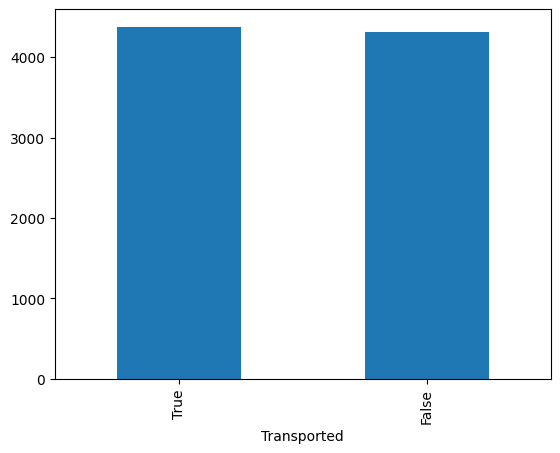

In [119]:
plot = dataset.Transported.value_counts()
plot.plot(kind='bar')

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>],
       [<Axes: title={'center': 'FoodCourt'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>]], dtype=object)

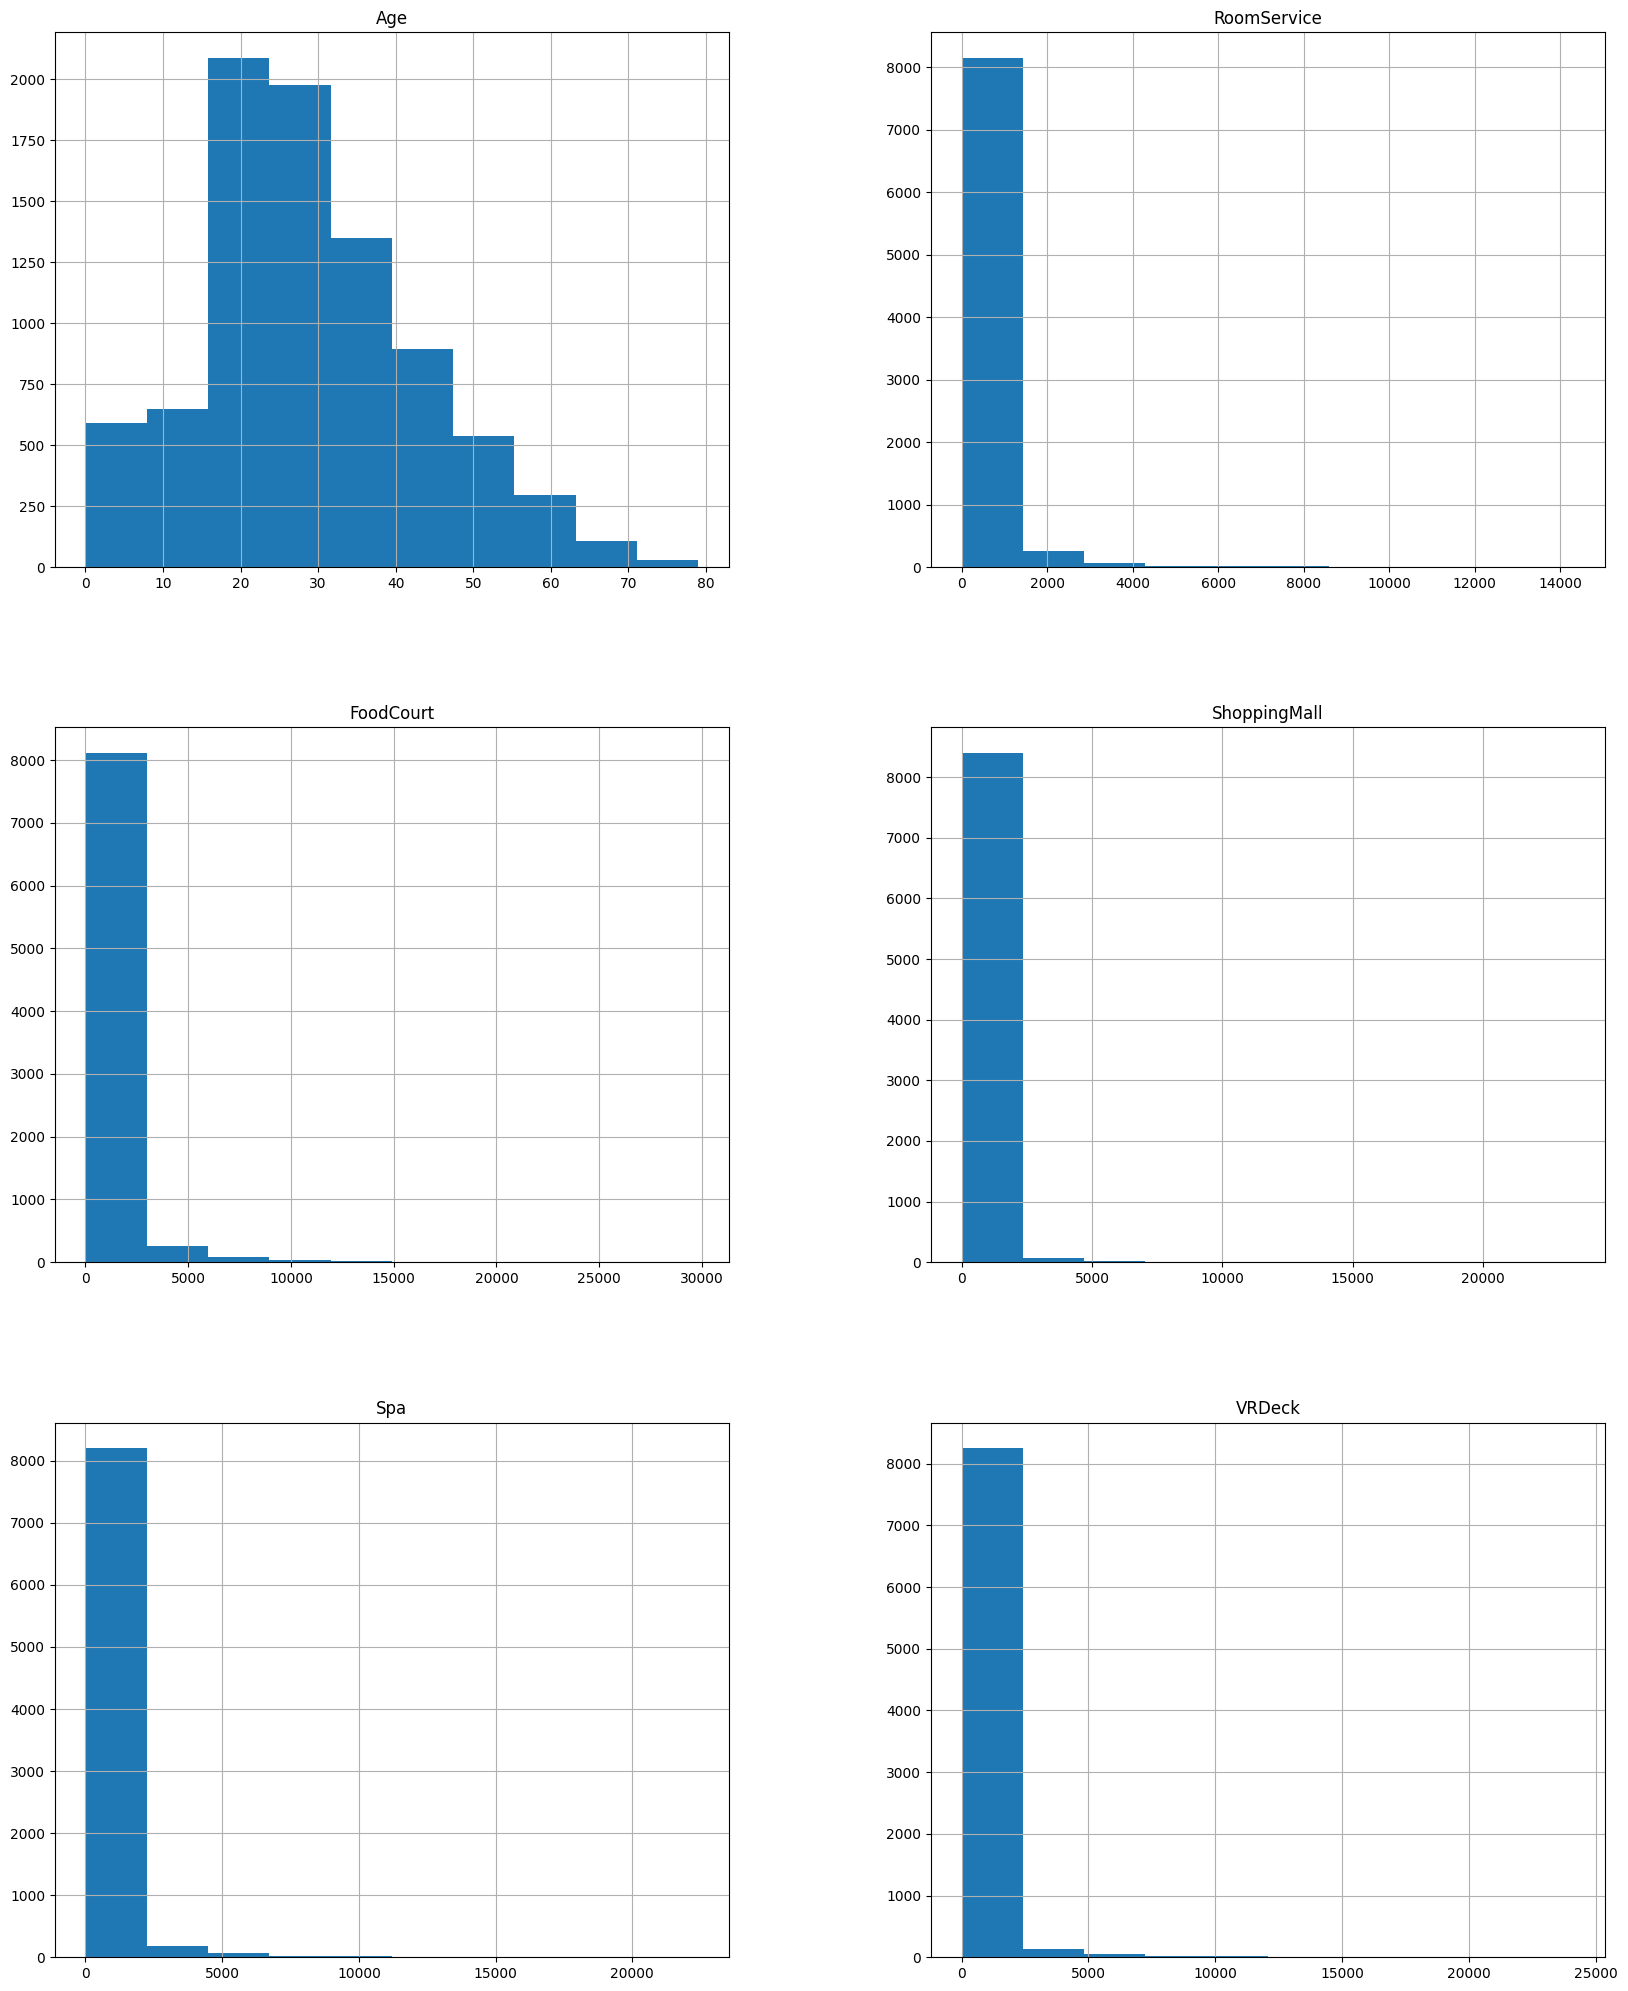

In [120]:
dataset.hist(bins=10, figsize=(20, 25))

# Feature engineering 

# Missing values

# Prepare dataset 

In [121]:
try:
    dataset = dataset.drop(['PassengerId', 'Name'], axis=1)
except:
    None
dataset.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


For the null values, lets put the median

In [122]:
medians = dataset[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].median()
dataset[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = dataset[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=medians)

In [123]:
dataset['Transported'] = dataset['Transported'].astype(int)
dataset['VIP'] = dataset['VIP'].astype(int)
dataset['CryoSleep'] = dataset['CryoSleep'].astype(int)
dataset.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1


Cabin has the format of /deck/cabin_num/side   split into 3 new columns 

In [124]:
dataset[['Deck', 'Cabin_num', 'Side']] = dataset['Cabin'].str.split('/', expand=True)
try:
    dataset = dataset.drop('Cabin', axis=1)
except:
    None
dataset.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S


convert categorical to int 

# Model selection

In [125]:
train_pd, test_pd = train_test_split(dataset, test_size=0.2, random_state=42)
print(len(train), len(test))

7 2


Convert from pandas to tensoflow. Better performance to train NN with GPU and TPU 


In [126]:
train = tfdf.keras.pd_dataframe_to_tf_dataset(train_pd, label='Transported')
test = tfdf.keras.pd_dataframe_to_tf_dataset(test_pd, label='Transported')

# Select

In [127]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

## Random forest

In [128]:
rf = tfdf.keras.RandomForestModel()
rf.compile(metrics=['accuracy'])
rf.fit(x=train)

Use /tmp/tmp4wm55pfv as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.424234. Found 6954 examples.
Training model...


[INFO 24-10-18 12:25:59.8844 UTC kernel.cc:1233] Loading model from path /tmp/tmp4wm55pfv/model/ with prefix 0df2bc7740514e07


Model trained in 0:00:46.512153
Compiling model...


[INFO 24-10-18 12:26:01.0729 UTC decision_forest.cc:734] Model loaded with 300 root(s), 235464 node(s), and 13 input feature(s).
[INFO 24-10-18 12:26:01.0730 UTC abstract_model.cc:1362] Engine "RandomForestGeneric" built
[INFO 24-10-18 12:26:01.0730 UTC kernel.cc:1061] Use fast generic engine


Model compiled.


In [129]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

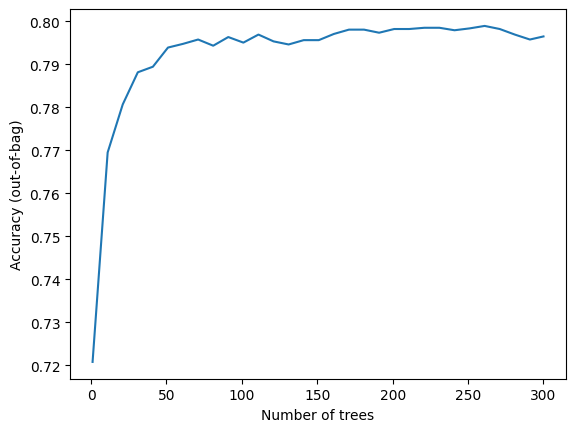

In [130]:
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")
plt.show()

In [131]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=6954, accuracy=0.7965199884958297, loss=0.5394786860299507, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [132]:
evaluation = tf.evaluate(x=test, return_dict=True)

for name, value in evaluation.items():
    print(name, value)

AttributeError: module 'tensorflow' has no attribute 'evaluate'

## Variable importance
How much does a feature contribute to the outpug 


In [ ]:
for imp in inspector.variable_importances().keys():
    print(imp)

In [ ]:
inspector.variable_importances()['NUM_AS_ROOT']

# Submission 

In [ ]:
dataset = pd.read_csv('../input/spaceship-titanic/test.csv')
submission_id = dataset.PassengerId

try:
    dataset = dataset.drop(['PassengerId', 'Name'], axis=1)
except:
    None
dataset.head()


medians = dataset[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].median()
dataset[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = dataset[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=medians)


# dataset['Transported'] = dataset['Transported'].astype(int)
dataset['VIP'] = dataset['VIP'].astype(int)
dataset['CryoSleep'] = dataset['CryoSleep'].astype(int)
dataset.head()


dataset[['Deck', 'Cabin_num', 'Side']] = dataset['Cabin'].str.split('/', expand=True)
try:
    dataset = dataset.drop('Cabin', axis=1)
except:
    None

dataset = tfdf.keras.pd_dataframe_to_tf_dataset(dataset)
    
# dataset.head()

In [ ]:
predict = rf.predict(dataset)
n_predict = (predict > 0.5).astype(bool)
output = pd.DataFrame({'PassengerId': submission_id, 'Transported': n_predict.squeeze()})
output.head()

In [137]:
import os
print(os.listdir('/kaggle/working'))


['.virtual_documents', 'submission.csv']


In [141]:
# submit = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')
# submit['Transported'] = n_predict 
# submit.to_csv('submission.csv', index=False) 
# submit.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [142]:
import random

sub2 = pd.read_csv('../input/spaceship-titanic/sample_submission.csv')
sub2['Dice'] = 0
for x in range(len(sub2)):
    sub2.at[x,'Dice'] = random.randint(1,6)
    
sub2.loc[sub2['Dice']%2==0,'Transported'] = True
sub2 = sub2.drop('Dice', axis=1)
print((sub2['Transported'] == True).sum()/len(sub2))
sub2.to_csv('submission.csv', index=False)
sub2

0.4994154781388824


,PassengerId,Transported
0,0013_01,False
1,0018_01,True
2,0019_01,True
3,0021_01,False
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,False
4275,9273_01,False
